In [1]:
import sys
import os
import json
curr_dir=os.getcwd()

current_dir = os.path.dirname(os.path.abspath(curr_dir))
# parent_dir = os.path.dirname(current_dir)
src_dir = os.path.dirname(current_dir) 
sys.path.append(current_dir) 
sys.path.append(current_dir+'\\src') 



In [2]:


import igraph as ig


In [3]:
import random

# 用 Python 自带的随机数种子间接控制
random.seed(42)

In [4]:
from  graph_diffuse_with_source.gds import Gds as Gds


In [5]:
def normalize_node_data(node_data):
    
    
    total = sum([v[1] for v in node_data])
    if total>0:
        node_data_2=[[k,v/total] for k,v in node_data]
    else:
        node_data_2=[[k,v] for k,v in node_data]

    return node_data_2

In [15]:

# 加载图

random.seed(42)
node_num =144
G = ig.Graph.Barabasi(n=node_num,m=2)
for i in range(0,node_num):
    G.vs[i]['node_id'] = str(i)


In [16]:
# 辅助函数
def merge_dicts_with_sum(list_of_dicts):
    """
    合并多个字典，将相同键的值相加

    参数:
        list_of_dicts: 字典列表

    返回:
        merged_dict: 合并后的字典，相同键的值已相加
    """
    # 初始化一个空字典用于存储结果
    merged_dict = {}
    
    # 遍历列表中的每个字典
    for d in list_of_dicts:
        # 遍历当前字典中的每个键值对
        for key, value in d.items():
            # 如果键已存在，则累加值；否则，直接添加键值对
            if key in merged_dict:
                merged_dict[key] += value
            else:
                merged_dict[key] = value
    
    return merged_dict

中心节点: {'1': 0.019765429042873577, '2': 0.021117860521401546, '4': 0.01593483641019761, '0': 0.01717420919723552, '8': 0.016065534733297897, '5': 0.02096522609132259, '18': 0.014436026936026941}


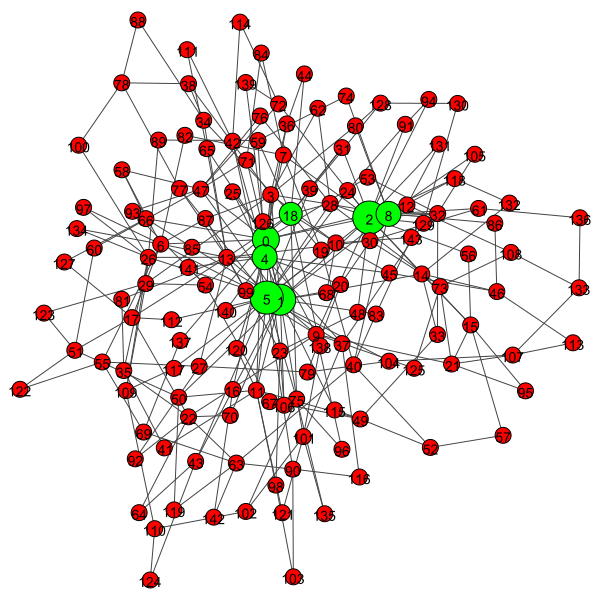

In [23]:

# 创建Gds实例
gds = Gds(G)

# 添加源节点
source_nodes = list(gds.nodeid_id_dict.keys())
gds.add_one_node_ids(source_nodes)

gds.FADE=0.3

# 执行传播
for _ in range(1):  # 迭代5次
    gds.add_one_node_ids(source_nodes)
    gds.emit_to_buffer(source_nodes)
    gds.merge_from_buffer()



# 计算中心节点
central_nodes = gds.show_central()
print("中心节点:", central_nodes)
# 可视化
node_data = [(node_id, score) for node_id, score in central_nodes.items()]
node_data=normalize_node_data(node_data)
gds.show_nodes(node_data)
ig.plot(gds.G,vertex_label=gds.G.vs["node_id"])


['15', '33', '41', '59'] 关联节点: {'1': 0.020048524460289173, '2': 0.02322599544203647, '4': 0.015934836410197613, '0': 0.01721066660759644, '8': 0.01797525695552012, '26': 0.015371090288853455, '5': 0.021023604096520772, '18': 0.014436026936026945}
{'2': 0.020833333333333332, '14': 0.0625, '21': 0.020833333333333332, '56': 0.020833333333333332, '57': 0.020833333333333332, '95': 0.020833333333333332, '15': 0.125, '32': 0.041666666666666664, '49': 0.041666666666666664, '33': 0.125, '11': 0.0625, '35': 0.0625, '41': 0.125, '4': 0.03125, '18': 0.03125, '74': 0.03125, '89': 0.03125, '59': 0.125}
['2', '14', '21', '56', '57', '95', '15', '32', '49', '33', '11', '35', '41', '4', '18', '74', '89', '59']


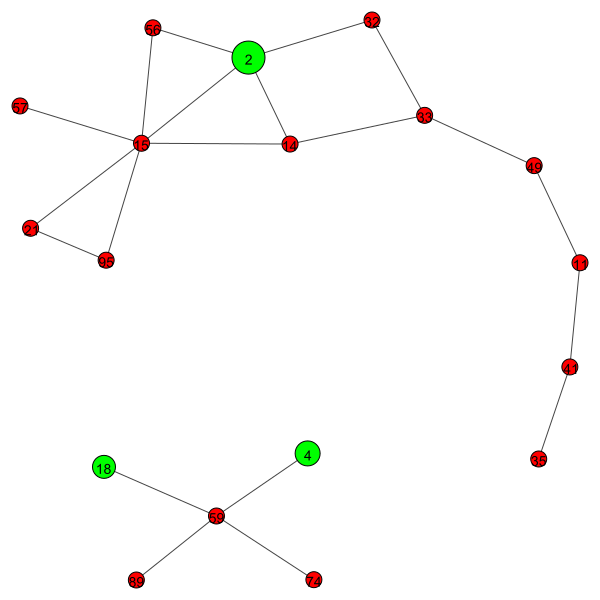

In [27]:
# 修改种子
random.seed(42)
# 创建Gds实例
gds = Gds(G)
# 添加源节点

selected_nodes = ['15','33','41','59']

# selected_nodes = ['15','33']
# selected_nodes = ['15']
result_node =[]
nodeids_all = list(gds.nodeid_id_dict.keys())
# for node in selected_nodes:
#     # 执行传播
#     result_node.append(gds.nodeid_id_dict[node])

for _ in range(1): 
    gds.negative_add_one_node_ids(selected_nodes)
    gds.emit_to_buffer(nodeids_all)
    gds.merge_from_buffer()


# 计算中心节点
central_nodes = gds.show_central()
print(selected_nodes,"关联节点:", central_nodes)
buffer =[]
for node_id in selected_nodes:
    r_msg = json.loads(gds.nodeid_msg_dict[node_id])
    buffer.append(r_msg)
    

merged_dict = merge_dicts_with_sum(buffer)
total = sum(merged_dict.values())
if total >0:
    factor=1/total
    factor_limit =2*(1/gds.G.vcount())

    merged_dict=  {key: (value*factor) for key, value in merged_dict.items()}
    filtered_dict = {key: value for key, value in merged_dict.items() if value >= factor_limit}
else:
    filtered_dict = merged_dict
print(filtered_dict)

node_ids_influenced = [k for k,v in filtered_dict.items()]
print(node_ids_influenced)
node_vids_influenced =[gds.nodeid_id_dict[i] for i in node_ids_influenced]
sub_influenced = gds.G.subgraph(node_vids_influenced)
ig.plot(sub_influenced,vertex_label=sub_influenced.vs["node_id"])






# ig.plot(black_subgraph,vertex_label=black_subgraph.vs["node_id"])
